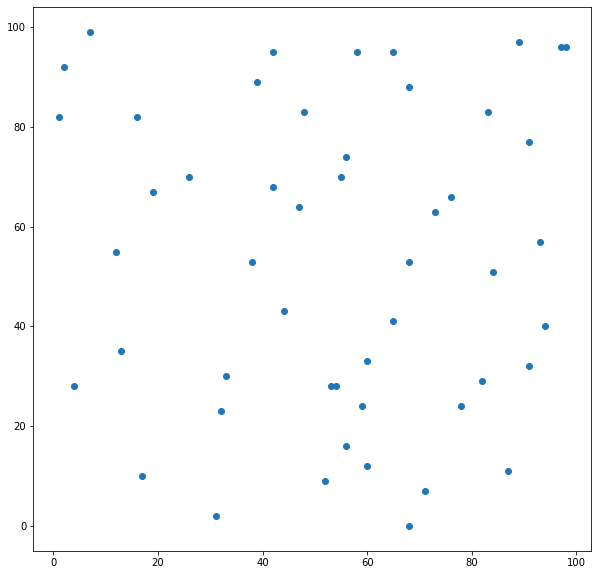

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data=np.round(np.random.random((100,2))*100)
train = data[0:50]
test = data[50:100]

plt.rcParams['figure.figsize'] = [10, 10]
plt.scatter(train[:,0],train[:,1])
plt.show()

In [2]:
class kohonen:
  def __init__(self,ni,nc,lr=0.2,intial_nhs=None,w=None):
    self.ni = ni
    self.nc = nc
    self.lr = lr
    

    if w is not None:
      self.w = w.copy()
    else:
      self.w = np.random.random((nc,ni))
    self.pw = self.w.copy()

    if intial_nhs is not None:
      self.nhs = self.inhs = intial_nhs
    else:
      self.nhs = self.inhs = nc-1
      



  def adjust_weights(self,x):
    d1 = x-self.w
    d=np.sum(d1**2,axis=1)
    t = np.argpartition(d,self.inhs)[:self.inhs+1]
    self.w[t] = self.w[t] + self.lr*d1[t]


  def create_cluster(self,all_x):
    c=0
    while(True):
      for i in all_x:
        self.adjust_weights(i)
      
      dw = np.abs(self.w - self.pw)
      dw[dw<0.0001] = 0
      if(np.sum(dw) == 0):
        break
      self.pw = self.w.copy()

      self.nhs = self.nhs*(1-self.lr)
      if self.nhs <0:
        self.nhs =0.0
      self.inhs = int(np.round(self.nhs))


      # self.lr = self.lr*0.999
      # if self.lr <0.001:
      #   self.lr=0.001
      c=c+1
    print(c)


  def cluster_list(self,all_x):
    l=[]
    for i in range(self.nc):
      l.append([])
    for i in range(len(all_x)):
      c=np.argmin(np.sum((all_x[i]-self.w)**2, axis=1))
      #print(c,i)
      l[c].append(i)
    return l

5


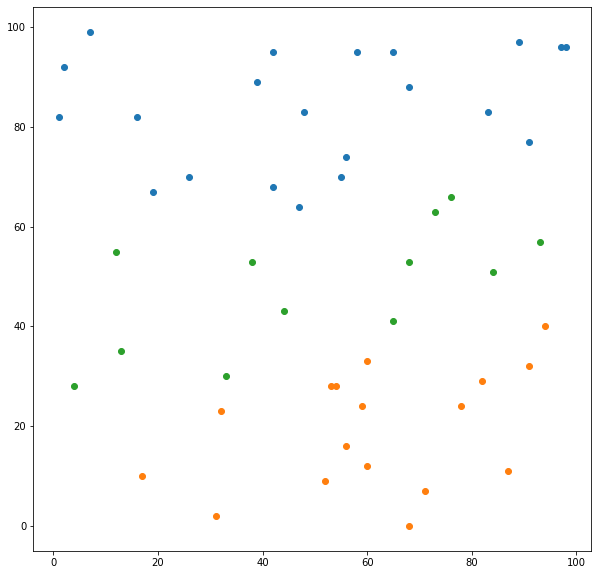

In [3]:
ko=kohonen(2,3)
ko.create_cluster(train)
res1=ko.cluster_list(train)

for i in res1:
  plt.scatter(train[i,0],train[i,1])
plt.show()



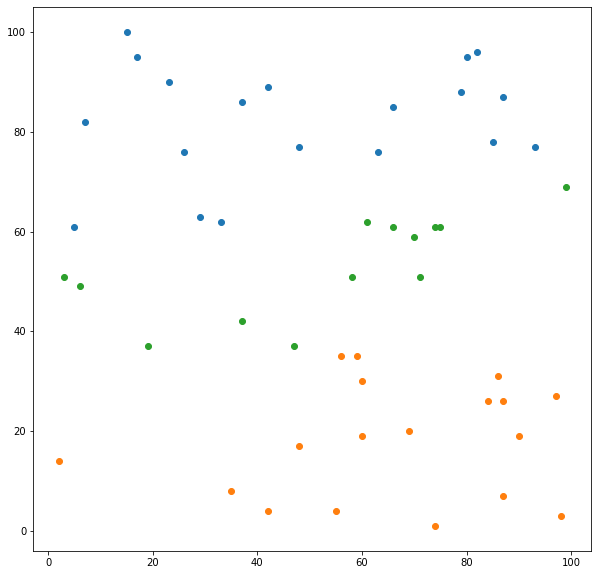

In [4]:
res_t=ko.cluster_list(test)
for i in res_t:
  plt.scatter(test[i,0],test[i,1])
plt.show()



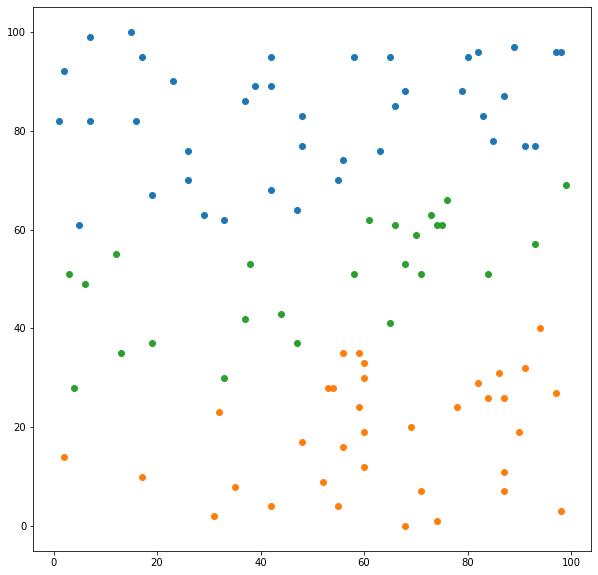

In [5]:
res_all=ko.cluster_list(data)
for i in res_all:
  plt.scatter(data[i,0],data[i,1])
plt.show()

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

def kohonen_train(X, output_dim, learning_rate, epochs):
    input_dim = X.shape[1]
    weights = np.random.randn(output_dim, input_dim)
    for epoch in range(epochs):
        for x in X:
            bmu_index = np.argmin(np.linalg.norm(weights - x, axis=1))  #sort index
            print(bmu_index)
            for i in range(output_dim):
                dist = np.abs(bmu_index - i)
                influence = np.exp(-dist / 2)
                weights[i] += learning_rate * influence * (x - weights[i])
    return weights

def kohonen_predict(X, weights):
    y_pred = np.zeros(len(X), dtype=int)
    for i, x in enumerate(X):
        # Find the best matching unit (BMU)
        bmu_index = np.argmin(np.linalg.norm(weights - x, axis=1))
        y_pred[i] = bmu_index
    return y_pred


X = np.random.randn(1000, 4)
y = np.random.randint(2, size=1000)

# 90-10

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
weights = kohonen_train(X_train, output_dim=2, learning_rate=0.1, epochs=100)
y_pred = kohonen_predict(X_test, weights)

# Compute the accuracy of the model
accuracy = np.mean(y_pred == y_test) * 100
print("Accuracy: %.2f%%" % accuracy)

1
1
1
1
1
1
1
1
1
0
0
1
0
0
1
1
0
0
1
1
0
1
1
1
1
1
1
0
0
1
1
0
0
0
0
0
1
0
1
1
0
1
0
1
1
0
1
1
1
0
1
0
1
1
1
0
0
1
0
0
0
1
1
1
0
0
0
0
0
1
1
1
0
1
0
1
1
0
0
0
1
1
1
0
0
0
1
0
1
0
1
0
0
0
0
1
1
0
0
0
0
1
1
1
0
0
0
0
1
1
1
1
0
1
0
1
1
1
1
0
1
0
1
1
0
1
0
0
0
1
1
0
1
0
0
1
0
1
0
1
1
1
1
1
1
0
0
1
0
1
0
0
1
1
1
0
1
0
0
0
1
0
1
0
1
0
0
1
0
0
1
0
0
1
1
1
0
1
1
1
0
0
1
1
1
0
1
1
1
0
0
0
1
1
0
0
1
0
1
0
0
0
1
0
0
0
1
0
0
1
0
1
1
1
1
0
0
1
0
0
0
1
0
1
1
0
0
1
0
1
0
1
1
1
0
1
1
1
0
1
0
0
0
1
0
0
1
0
0
1
1
0
1
0
1
0
1
1
0
1
1
1
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
1
0
0
1
1
1
0
1
0
1
0
1
0
1
1
0
1
0
1
0
1
0
1
1
0
0
0
0
1
1
1
1
0
0
1
0
1
0
1
0
0
1
0
1
0
1
0
0
1
1
0
1
0
1
1
1
1
1
0
0
0
0
1
1
1
0
0
1
0
1
0
0
1
0
1
0
0
1
1
0
1
0
1
1
1
0
0
1
0
0
0
0
1
0
0
1
1
0
0
1
0
1
0
0
1
1
0
0
1
1
1
1
1
0
0
1
0
1
0
0
0
0
1
0
1
1
0
1
1
1
0
1
0
1
0
0
0
0
0
0
0
1
1
1
1
1
0
0
0
0
1
0
1
0
0
1
1
0
1
1
1
0
0
1
1
1
1
0
1
1
1
0
1
0
0
0
1
1
0
1
0
0
0
0
1
0
0
0
1
1
1
1
1
0
1
1
0
0
1
0
0
0
1
1
0
1
0
0
0
0
1
0
0
1
1
1
1
1
0
1


1
1
1
0
1
1
0
0
1
0
0
0
1
1
0
1
0
0
0
0
1
0
0
1
1
1
1
1
0
1
1
1
1
1
0
1
0
0
0
1
0
1
1
1
0
0
1
1
0
0
1
0
1
1
1
0
0
0
1
0
1
0
0
1
0
0
1
1
1
1
1
0
1
1
1
0
0
1
1
0
0
1
1
1
1
0
0
0
0
1
1
1
1
0
1
0
1
1
0
0
1
0
0
1
1
0
1
1
0
0
0
1
0
1
0
1
1
0
0
0
0
0
1
0
0
1
1
0
0
1
1
0
1
1
1
1
0
0
0
0
0
1
0
1
1
1
1
1
0
1
0
1
1
0
0
0
1
1
0
1
1
0
0
1
0
1
0
1
0
1
1
1
1
0
1
1
1
0
1
0
1
1
0
1
1
1
0
0
0
1
0
0
0
0
0
1
1
1
1
1
0
1
0
0
0
0
0
0
1
0
0
1
1
0
1
0
0
1
1
1
0
1
1
0
0
1
1
0
1
0
1
1
0
1
0
1
1
0
1
1
0
0
1
0
1
0
1
1
0
0
0
0
1
1
1
0
1
0
0
1
0
1
1
0
1
0
0
1
1
0
0
0
1
1
0
0
0
1
0
0
0
1
1
1
1
0
0
0
1
1
0
0
1
0
1
0
0
0
1
1
0
0
1
1
0
1
0
1
0
1
1
0
0
0
0
1
0
0
0
0
0
1
0
1
0
0
1
0
0
1
1
1
0
1
1
0
1
1
1
0
0
0
0
0
0
0
1
0
1
1
0
1
1
0
1
1
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
1
1
0
0
1
1
0
1
1
0
1
1
1
0
1
0
0
1
0
1
1
0
0
1
0
1
0
0
1
1
1
0
1
0
0
1
1
1
1
1
0
1
0
0
1
0
0
1
1
0
1
0
0
0
1
0
0
1
0
1
1
1
0
1
0
1
0
0
1
0
0
1
1
0
1
0
1
0
0
0
1
0
0
1
0
1
1
1
1
1
0
0
0
1
1
0
1
1
1
0
0
1
0
1
1
0
1
1
1
0
1
0
0
0
1
1
0
1
0
0
0
0
0
1
1
1
1
1
0


0
0
1
1
0
0
0
0
1
1
1
0
0
0
0
1
1
1
1
0
1
0
1
1
1
1
0
1
0
1
1
0
1
0
0
0
1
1
0
1
0
0
1
0
1
0
1
1
1
1
1
1
0
0
1
0
1
0
0
1
1
1
0
1
0
0
0
1
0
1
0
1
0
0
1
0
0
1
0
0
1
1
1
0
1
1
1
0
0
1
1
1
0
1
1
1
0
0
0
1
1
0
0
1
0
1
0
0
0
1
0
0
0
1
0
0
1
0
1
1
1
1
0
0
1
0
0
0
1
0
1
1
0
0
1
0
1
0
1
1
1
0
1
1
1
0
1
0
0
0
1
0
0
1
0
0
1
1
0
1
0
1
0
1
1
0
1
1
1
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
1
0
0
1
1
1
0
1
0
1
0
1
0
1
1
0
1
0
1
0
1
0
1
1
0
0
0
0
1
1
1
1
0
0
1
0
1
0
1
0
0
1
0
1
0
1
0
0
1
1
0
1
0
1
1
1
1
1
0
0
0
0
1
1
1
0
0
1
0
1
0
0
1
0
1
0
0
1
1
0
1
0
1
1
1
0
0
1
0
0
0
0
1
0
0
1
1
0
0
1
0
1
0
0
1
1
0
0
1
1
1
1
1
0
0
1
0
1
0
0
0
0
1
0
1
1
0
1
1
1
0
1
0
1
0
0
0
0
0
0
0
1
1
1
1
1
0
0
0
0
1
0
1
0
0
1
1
0
1
1
1
0
0
1
1
1
1
0
1
1
1
0
1
0
0
0
1
1
0
1
0
0
0
0
1
0
0
0
1
1
1
1
1
0
1
1
0
0
1
0
0
0
1
1
0
1
0
0
0
0
1
0
0
1
1
1
1
1
0
1
1
1
1
1
0
1
0
0
0
1
0
1
1
1
0
0
1
1
0
0
1
0
1
1
1
0
0
0
1
0
1
0
0
1
0
0
1
1
1
1
1
0
1
1
1
0
0
1
1
0
0
1
1
1
1
0
0
0
0
1
1
1
1
0
1
0
1
1
0
0
1
0
0
1
1
0
1
1
0
0
0
1
0
1
0
1
1
0
0
0
0
0
1


0
0
0
1
0
1
1
1
0
1
0
0
0
1
1
0
0
1
1
0
1
0
0
0
1
1
1
0
1
0
1
1
0
1
1
0
0
0
0
0
1
0
0
0
1
1
0
0
1
1
0
0
0
0
1
1
1
1
0
0
0
0
1
0
1
0
0
1
1
0
1
1
0
0
1
0
0
1
1
1
0
1
0
1
0
0
1
1
1
1
1
0
1
1
0
0
1
1
0
0
1
0
0
0
0
1
1
1
1
1
0
1
0
0
0
0
0
1
0
1
0
0
1
1
1
0
0
1
0
0
1
1
0
1
0
1
0
1
0
0
0
0
1
0
0
0
1
0
1
0
0
1
0
0
0
1
1
1
0
1
1
1
1
1
0
0
0
0
0
1
0
1
1
1
1
1
1
0
1
1
0
0
1
0
1
1
0
0
0
1
0
0
1
1
0
0
1
0
1
0
0
1
0
1
0
0
1
0
0
1
1
0
1
0
1
0
0
1
1
1
1
0
0
0
1
0
1
1
0
1
0
0
1
0
1
1
0
0
1
1
1
0
0
1
1
1
0
1
1
1
0
0
0
0
1
1
1
0
0
1
1
0
1
0
1
1
1
0
0
1
1
0
0
1
0
1
0
1
0
0
1
1
1
1
0
1
1
1
1
1
0
1
0
1
1
0
1
1
0
0
0
1
0
0
1
0
0
0
1
1
1
1
1
1
1
0
1
0
0
1
0
0
1
0
0
0
1
1
1
0
1
1
1
1
1
1
0
1
1
1
0
0
1
1
0
0
1
0
0
1
0
0
0
1
0
1
1
0
1
0
0
1
1
0
1
0
1
1
0
0
0
1
0
1
1
0
0
0
0
0
1
0
1
1
0
1
1
0
0
1
0
1
1
1
0
1
1
0
1
0
0
0
1
0
1
0
1
1
0
1
1
0
0
1
0
1
0
1
1
1
0
1
1
0
1
0
0
0
0
0
1
1
1
0
0
1
0
0
0
1
1
0
1
0
0
1
0
0
0
1
0
1
1
1
0
0
1
0
1
1
1
1
1
0
0
0
0
0
1
1
1
0
1
0
1
1
0
0
0
1
1
1
0
0
0
1
0
1
0
1
0
0
0
0
1
1
0
0
0
0


1
0
0
0
1
0
0
0
1
1
1
0
0
1
1
0
1
0
1
1
1
0
1
1
1
0
1
1
0
1
0
0
0
0
1
1
0
1
1
1
0
1
0
0
1
1
0
1
0
1
0
0
0
1
0
0
0
1
0
1
1
1
0
1
1
0
1
1
0
0
1
0
1
0
1
0
0
1
0
0
0
1
0
1
1
1
1
0
1
1
1
1
0
1
1
1
1
0
1
0
1
1
0
0
0
1
0
1
0
1
0
1
0
0
1
0
1
0
1
0
1
0
0
1
1
1
1
0
0
0
0
1
1
0
1
0
1
0
1
1
0
1
0
1
0
1
1
0
0
1
0
1
0
0
0
0
0
1
1
1
1
0
0
0
1
1
0
1
0
1
1
0
1
0
1
1
0
0
1
0
1
0
0
0
1
1
0
1
1
1
1
0
1
1
0
0
1
1
0
1
0
1
1
0
0
1
1
0
0
0
0
0
1
1
0
1
0
1
1
1
1
0
1
0
0
1
0
0
0
1
0
1
0
1
1
1
1
1
1
1
0
0
0
0
0
1
1
1
1
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
0
1
0
0
0
1
0
1
1
1
0
0
1
0
1
1
1
1
0
1
1
1
0
0
0
0
0
1
0
0
1
1
0
1
1
1
0
0
1
0
1
1
1
1
0
1
1
0
0
0
0
0
1
0
0
0
0
0
1
0
1
1
1
0
1
0
0
0
1
1
0
0
1
1
0
1
0
0
0
1
1
1
0
1
0
1
1
0
1
1
0
0
0
0
0
1
0
0
0
1
1
0
0
1
1
0
0
0
0
1
1
1
1
0
0
0
0
1
0
1
0
0
1
1
0
1
1
0
0
1
0
0
1
1
1
0
1
0
1
0
0
1
1
1
1
1
0
1
1
0
0
1
1
0
0
1
0
0
0
0
1
1
1
1
1
0
1
0
0
0
0
0
1
0
1
0
0
1
1
1
0
0
1
0
0
1
1
0
1
0
1
0
1
0
0
0
0
1
0
0
0
1
0
1
0
0
1
0
0
0
1
1
1
0
1
1
1
1
1
0
0
0
0
0
1
0
1
1
1
1
1
1
0
1
1


1
0
0
1
1
0
1
0
1
1
0
0
0
1
0
1
1
0
0
0
0
0
1
0
1
1
0
1
1
0
0
1
0
1
1
1
0
1
1
0
1
0
0
0
1
0
1
0
1
1
0
1
1
0
0
1
0
1
0
1
1
1
0
1
1
0
1
0
0
0
0
0
1
1
1
0
0
1
0
0
0
1
1
0
1
0
0
1
0
0
0
1
0
1
1
1
0
0
1
0
1
1
1
1
1
0
0
0
0
0
1
1
1
0
1
0
1
1
0
0
0
1
1
1
0
0
0
1
0
1
0
1
0
0
0
0
1
1
0
0
0
0
1
1
1
0
0
0
0
1
1
1
1
0
1
0
1
1
1
1
0
1
0
1
1
0
1
0
0
0
1
1
0
1
0
0
1
0
1
0
1
1
1
1
1
1
0
0
1
0
1
0
0
1
1
1
0
1
0
0
0
1
0
1
0
1
0
0
1
0
0
1
0
0
1
1
1
0
1
1
1
0
0
1
1
1
0
1
1
1
0
0
0
1
1
0
0
1
0
1
0
0
0
1
0
0
0
1
0
0
1
0
1
1
1
1
0
0
1
0
0
0
1
0
1
1
0
0
1
0
1
0
1
1
1
0
1
1
1
0
1
0
0
0
1
0
0
1
0
0
1
1
0
1
0
1
0
1
1
0
1
1
1
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
1
0
0
1
1
1
0
1
0
1
0
1
0
1
1
0
1
0
1
0
1
0
1
1
0
0
0
0
1
1
1
1
0
0
1
0
1
0
1
0
0
1
0
1
0
1
0
0
1
1
0
1
0
1
1
1
1
1
0
0
0
0
1
1
1
0
0
1
0
1
0
0
1
0
1
0
0
1
1
0
1
0
1
1
1
0
0
1
0
0
0
0
1
0
0
1
1
0
0
1
0
1
0
0
1
1
0
0
1
1
1
1
1
0
0
1
0
1
0
0
0
0
1
0
1
1
0
1
1
1
0
1
0
1
0
0
0
0
0
0
0
1
1
1
1
1
0
0
0
0
1
0
1
0
0
1
1
0
1
1
1
0
0
1
1
1
1
0
1
1
1
0
1
0
0
0
1
1
0


1
1
0
1
0
0
1
0
1
1
0
1
0
0
1
1
0
0
0
1
1
0
0
0
1
0
0
0
1
1
1
1
0
0
0
1
1
0
0
1
0
1
0
0
0
1
1
0
0
1
1
0
1
0
1
0
1
1
0
0
0
0
1
0
0
0
0
0
1
0
1
0
0
1
0
0
1
1
1
0
1
1
0
1
1
1
0
0
0
0
0
0
0
1
0
1
1
0
1
1
0
1
1
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
1
1
0
0
1
1
0
1
1
0
1
1
1
0
1
0
0
1
0
1
1
0
0
1
0
1
0
0
1
1
1
0
1
0
0
1
1
1
1
1
0
1
0
0
1
0
0
1
1
0
1
0
0
0
1
0
0
1
0
1
1
1
0
1
0
1
0
0
1
0
0
1
1
0
1
0
1
0
0
0
1
0
0
1
0
1
1
1
1
1
0
0
0
1
1
0
1
1
1
0
0
1
0
1
1
0
1
1
1
0
1
0
0
0
1
1
0
1
0
0
0
0
0
1
1
1
1
1
0
0
0
1
0
1
0
0
1
1
1
0
0
0
1
1
1
0
1
0
1
0
1
1
1
1
0
0
1
1
1
1
0
0
0
1
1
1
1
0
0
0
0
1
0
1
0
0
0
0
1
0
1
0
0
1
0
1
1
1
0
0
1
0
1
1
0
1
0
1
0
0
0
0
0
0
1
1
0
1
0
1
1
0
0
0
1
0
1
1
1
0
1
0
1
0
1
1
0
1
1
0
1
1
0
0
0
1
0
0
0
1
1
0
0
0
1
0
0
0
1
1
1
0
0
1
1
0
1
0
1
1
1
0
1
1
1
0
1
1
0
1
0
0
0
0
1
1
0
1
1
1
0
1
0
0
1
1
0
1
0
1
0
0
0
1
0
0
0
1
0
1
1
1
0
1
1
0
1
1
0
0
1
0
1
0
1
0
0
1
0
0
0
1
0
1
1
1
1
0
1
1
1
1
0
1
1
1
1
0
1
0
1
1
0
0
0
1
0
1
0
1
0
1
0
0
1
0
1
0
1
0
1
0
0
1
1
1
1
0
0
0
0
1
1
0
1
0
1
0
1
1
0
1


1
0
1
1
0
1
0
1
1
0
0
1
0
1
0
0
0
1
1
0
1
1
1
1
0
1
1
0
0
1
1
0
1
0
1
1
0
0
1
1
0
0
0
0
0
1
1
0
1
0
1
1
1
1
0
1
0
0
1
0
0
0
1
0
1
0
1
1
1
1
1
1
1
0
0
0
0
0
1
1
1
1
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
0
1
0
0
0
1
0
1
1
1
0
0
1
0
1
1
1
1
0
1
1
1
0
0
0
0
0
1
0
0
1
1
0
1
1
1
0
0
1
0
1
1
1
1
0
1
1
0
0
0
0
0
1
0
0
0
0
0
1
0
1
1
1
0
1
0
0
0
1
1
0
0
1
1
0
1
0
0
0
1
1
1
0
1
0
1
1
0
1
1
0
0
0
0
0
1
0
0
0
1
1
0
0
1
1
0
0
0
0
1
1
1
1
0
0
0
0
1
0
1
0
0
1
1
0
1
1
0
0
1
0
0
1
1
1
0
1
0
1
0
0
1
1
1
1
1
0
1
1
0
0
1
1
0
0
1
0
0
0
0
1
1
1
1
1
0
1
0
0
0
0
0
1
0
1
0
0
1
1
1
0
0
1
0
0
1
1
0
1
0
1
0
1
0
0
0
0
1
0
0
0
1
0
1
0
0
1
0
0
0
1
1
1
0
1
1
1
1
1
0
0
0
0
0
1
0
1
1
1
1
1
1
0
1
1
0
0
1
0
1
1
0
0
0
1
0
0
1
1
0
0
1
0
1
0
0
1
0
1
0
0
1
0
0
1
1
0
1
0
1
0
0
1
1
1
1
0
0
0
1
0
1
1
0
1
0
0
1
0
1
1
0
0
1
1
1
0
0
1
1
1
0
1
1
1
0
0
0
0
1
1
1
0
0
1
1
0
1
0
1
1
1
0
0
1
1
0
0
1
0
1
0
1
0
0
1
1
1
1
0
1
1
1
1
1
0
1
0
1
1
0
1
1
0
0
0
1
0
0
1
0
0
0
1
1
1
1
1
1
1
0
1
0
0
1
0
0
1
0
0
0
1
1
1
0
1
1
1
1
1
1
0
1
1
1
0
0
1
1
0
0
1


1
1
0
0
1
1
0
1
0
1
1
1
0
0
1
1
0
0
1
0
1
0
1
0
0
1
1
1
1
0
1
1
1
1
1
0
1
0
1
1
0
1
1
0
0
0
1
0
0
1
0
0
0
1
1
1
1
1
1
1
0
1
0
0
1
0
0
1
0
0
0
1
1
1
0
1
1
1
1
1
1
0
1
1
1
0
0
1
1
0
0
1
0
0
1
0
0
0
1
0
1
1
0
1
0
0
1
1
0
1
0
1
1
0
0
0
1
0
1
1
0
0
0
0
0
1
0
1
1
0
1
1
0
0
1
0
1
1
1
0
1
1
0
1
0
0
0
1
0
1
0
1
1
0
1
1
0
0
1
0
1
0
1
1
1
0
1
1
0
1
0
0
0
0
0
1
1
1
0
0
1
0
0
0
1
1
0
1
0
0
1
0
0
0
1
0
1
1
1
0
0
1
0
1
1
1
1
1
0
0
0
0
0
1
1
1
0
1
0
1
1
0
0
0
1
1
1
0
0
0
1
0
1
0
1
0
0
0
0
1
1
0
0
0
0
1
1
1
0
0
0
0
1
1
1
1
0
1
0
1
1
1
1
0
1
0
1
1
0
1
0
0
0
1
1
0
1
0
0
1
0
1
0
1
1
1
1
1
1
0
0
1
0
1
0
0
1
1
1
0
1
0
0
0
1
0
1
0
1
0
0
1
0
0
1
0
0
1
1
1
0
1
1
1
0
0
1
1
1
0
1
1
1
0
0
0
1
1
0
0
1
0
1
0
0
0
1
0
0
0
1
0
0
1
0
1
1
1
1
0
0
1
0
0
0
1
0
1
1
0
0
1
0
1
0
1
1
1
0
1
1
1
0
1
0
0
0
1
0
0
1
0
0
1
1
0
1
0
1
0
1
1
0
1
1
1
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
1
0
0
1
1
1
0
1
0
1
0
1
0
1
1
0
1
0
1
0
1
0
1
1
0
0
0
0
1
1
1
1
0
0
1
0
1
0
1
0
0
1
0
1
0
1
0
0
1
1
0
1
0
1
1
1
1
1
0
0
0
0
1
1
1
0
0
1
0
1
0
0
1
0
1
0


1
1
1
1
1
0
1
0
0
0
0
0
0
1
0
0
1
1
0
1
0
0
1
1
1
0
1
1
0
0
1
1
0
1
0
1
1
0
1
0
1
1
0
1
1
0
0
1
0
1
0
1
1
0
0
0
0
1
1
1
0
1
0
0
1
0
1
1
0
1
0
0
1
1
0
0
0
1
1
0
0
0
1
0
0
0
1
1
1
1
0
0
0
1
1
0
0
1
0
1
0
0
0
1
1
0
0
1
1
0
1
0
1
0
1
1
0
0
0
0
1
0
0
0
0
0
1
0
1
0
0
1
0
0
1
1
1
0
1
1
0
1
1
1
0
0
0
0
0
0
0
1
0
1
1
0
1
1
0
1
1
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
1
1
0
0
1
1
0
1
1
0
1
1
1
0
1
0
0
1
0
1
1
0
0
1
0
1
0
0
1
1
1
0
1
0
0
1
1
1
1
1
0
1
0
0
1
0
0
1
1
0
1
0
0
0
1
0
0
1
0
1
1
1
0
1
0
1
0
0
1
0
0
1
1
0
1
0
1
0
0
0
1
0
0
1
0
1
1
1
1
1
0
0
0
1
1
0
1
1
1
0
0
1
0
1
1
0
1
1
1
0
1
0
0
0
1
1
0
1
0
0
0
0
0
1
1
1
1
1
0
0
0
1
0
1
0
0
1
1
1
0
0
0
1
1
1
0
1
0
1
0
1
1
1
1
0
0
1
1
1
1
0
0
0
1
1
1
1
0
0
0
0
1
0
1
0
0
0
0
1
0
1
0
0
1
0
1
1
1
0
0
1
0
1
1
0
1
0
1
0
0
0
0
0
0
1
1
0
1
0
1
1
0
0
0
1
0
1
1
1
0
1
0
1
0
1
1
0
1
1
0
1
1
0
0
0
1
0
0
0
1
1
0
0
0
1
0
0
0
1
1
1
0
0
1
1
0
1
0
1
1
1
0
1
1
1
0
1
1
0
1
0
0
0
0
1
1
0
1
1
1
0
1
0
0
1
1
0
1
0
1
0
0
0
1
0
0
0
1
0
1
1
1
0
1
1
0
1
1
0
0
1
0
1
0
1
0
0
1
0
0
0
1
0
1


0
1
1
0
1
1
1
0
0
0
0
0
0
0
1
0
1
1
0
1
1
0
1
1
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
1
1
0
0
1
1
0
1
1
0
1
1
1
0
1
0
0
1
0
1
1
0
0
1
0
1
0
0
1
1
1
0
1
0
0
1
1
1
1
1
0
1
0
0
1
0
0
1
1
0
1
0
0
0
1
0
0
1
0
1
1
1
0
1
0
1
0
0
1
0
0
1
1
0
1
0
1
0
0
0
1
0
0
1
0
1
1
1
1
1
0
0
0
1
1
0
1
1
1
0
0
1
0
1
1
0
1
1
1
0
1
0
0
0
1
1
0
1
0
0
0
0
0
1
1
1
1
1
0
0
0
1
0
1
0
0
1
1
1
0
0
0
1
1
1
0
1
0
1
0
1
1
1
1
0
0
1
1
1
1
0
0
0
1
1
1
1
0
0
0
0
1
0
1
0
0
0
0
1
0
1
0
0
1
0
1
1
1
0
0
1
0
1
1
0
1
0
1
0
0
0
0
0
0
1
1
0
1
0
1
1
0
0
0
1
0
1
1
1
0
1
0
1
0
1
1
0
1
1
0
1
1
0
0
0
1
0
0
0
1
1
0
0
0
1
0
0
0
1
1
1
0
0
1
1
0
1
0
1
1
1
0
1
1
1
0
1
1
0
1
0
0
0
0
1
1
0
1
1
1
0
1
0
0
1
1
0
1
0
1
0
0
0
1
0
0
0
1
0
1
1
1
0
1
1
0
1
1
0
0
1
0
1
0
1
0
0
1
0
0
0
1
0
1
1
1
1
0
1
1
1
1
0
1
1
1
1
0
1
0
1
1
0
0
0
1
0
1
0
1
0
1
0
0
1
0
1
0
1
0
1
0
0
1
1
1
1
0
0
0
0
1
1
0
1
0
1
0
1
1
0
1
0
1
0
1
1
0
0
1
0
1
0
0
0
0
0
1
1
1
1
0
0
0
1
1
0
1
0
1
1
0
1
0
1
1
0
0
1
0
1
0
0
0
1
1
0
1
1
1
1
0
1
1
0
0
1
1
0
1
0
1
1
0
0
1
1
0
0
0
0
0
1
1
0
1
0
1
1
1
1


0
1
1
0
1
0
0
1
0
0
0
1
0
1
1
1
0
0
1
0
1
1
1
1
1
0
0
0
0
0
1
1
1
0
1
0
1
1
0
0
0
1
1
1
0
0
0
1
0
1
0
1
0
0
0
0
1
1
0
0
0
0
1
1
1
0
0
0
0
1
1
1
1
0
1
0
1
1
1
1
0
1
0
1
1
0
1
0
0
0
1
1
0
1
0
0
1
0
1
0
1
1
1
1
1
1
0
0
1
0
1
0
0
1
1
1
0
1
0
0
0
1
0
1
0
1
0
0
1
0
0
1
0
0
1
1
1
0
1
1
1
0
0
1
1
1
0
1
1
1
0
0
0
1
1
0
0
1
0
1
0
0
0
1
0
0
0
1
0
0
1
0
1
1
1
1
0
0
1
0
0
0
1
0
1
1
0
0
1
0
1
0
1
1
1
0
1
1
1
0
1
0
0
0
1
0
0
1
0
0
1
1
0
1
0
1
0
1
1
0
1
1
1
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
1
0
0
1
1
1
0
1
0
1
0
1
0
1
1
0
1
0
1
0
1
0
1
1
0
0
0
0
1
1
1
1
0
0
1
0
1
0
1
0
0
1
0
1
0
1
0
0
1
1
0
1
0
1
1
1
1
1
0
0
0
0
1
1
1
0
0
1
0
1
0
0
1
0
1
0
0
1
1
0
1
0
1
1
1
0
0
1
0
0
0
0
1
0
0
1
1
0
0
1
0
1
0
0
1
1
0
0
1
1
1
1
1
0
0
1
0
1
0
0
0
0
1
0
1
1
0
1
1
1
0
1
0
1
0
0
0
0
0
0
0
1
1
1
1
1
0
0
0
0
1
0
1
0
0
1
1
0
1
1
1
0
0
1
1
1
1
0
1
1
1
0
1
0
0
0
1
1
0
1
0
0
0
0
1
0
0
0
1
1
1
1
1
0
1
1
0
0
1
0
0
0
1
1
0
1
0
0
0
0
1
0
0
1
1
1
1
1
0
1
1
1
1
1
0
1
0
0
0
1
0
1
1
1
0
0
1
1
0
0
1
0
1
1
1
0
0
0
1
0
1
0
0
1
0
0
1
1
1


1
1
0
1
0
0
1
0
0
0
1
0
1
1
1
0
0
1
0
1
1
1
1
1
0
0
0
0
0
1
1
1
0
1
0
1
1
0
0
0
1
1
1
0
0
0
1
0
1
0
1
0
0
0
0
1
1
0
0
0
0
1
1
1
0
0
0
0
1
1
1
1
0
1
0
1
1
1
1
0
1
0
1
1
0
1
0
0
0
1
1
0
1
0
0
1
0
1
0
1
1
1
1
1
1
0
0
1
0
1
0
0
1
1
1
0
1
0
0
0
1
0
1
0
1
0
0
1
0
0
1
0
0
1
1
1
0
1
1
1
0
0
1
1
1
0
1
1
1
0
0
0
1
1
0
0
1
0
1
0
0
0
1
0
0
0
1
0
0
1
0
1
1
1
1
0
0
1
0
0
0
1
0
1
1
0
0
1
0
1
0
1
1
1
0
1
1
1
0
1
0
0
0
1
0
0
1
0
0
1
1
0
1
0
1
0
1
1
0
1
1
1
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
1
0
0
1
1
1
0
1
0
1
0
1
0
1
1
0
1
0
1
0
1
0
1
1
0
0
0
0
1
1
1
1
0
0
1
0
1
0
1
0
0
1
0
1
0
1
0
0
1
1
0
1
0
1
1
1
1
1
0
0
0
0
1
1
1
0
0
1
0
1
0
0
1
0
1
0
0
1
1
0
1
0
1
1
1
0
0
1
0
0
0
0
1
0
0
1
1
0
0
1
0
1
0
0
1
1
0
0
1
1
1
1
1
0
0
1
0
1
0
0
0
0
1
0
1
1
0
1
1
1
0
1
0
1
0
0
0
0
0
0
0
1
1
1
1
1
0
0
0
0
1
0
1
0
0
1
1
0
1
1
1
0
0
1
1
1
1
0
1
1
1
0
1
0
0
0
1
1
0
1
0
0
0
0
1
0
0
0
1
1
1
1
1
0
1
1
0
0
1
0
0
0
1
1
0
1
0
0
0
0
1
0
0
1
1
1
1
1
0
1
1
1
1
1
0
1
0
0
0
1
0
1
1
1
0
0
1
1
0
0
1
0
1
1
1
0
0
0
1
0
1
0
0
1
0
0
1
1
1
1


0
0
0
0
1
0
0
0
1
1
1
1
1
0
1
1
0
0
1
0
0
0
1
1
0
1
0
0
0
0
1
0
0
1
1
1
1
1
0
1
1
1
1
1
0
1
0
0
0
1
0
1
1
1
0
0
1
1
0
0
1
0
1
1
1
0
0
0
1
0
1
0
0
1
0
0
1
1
1
1
1
0
1
1
1
0
0
1
1
0
0
1
1
1
1
0
0
0
0
1
1
1
1
0
1
0
1
1
0
0
1
0
0
1
1
0
1
1
0
0
0
1
0
1
0
1
1
0
0
0
0
0
1
0
0
1
1
0
0
1
1
0
1
1
1
1
0
0
0
0
0
1
0
1
1
1
1
1
0
1
0
1
1
0
0
0
1
1
0
1
1
0
0
1
0
1
0
1
0
1
1
1
1
0
1
1
1
0
1
0
1
1
0
1
1
1
0
0
0
1
0
0
0
0
0
1
1
1
1
1
0
1
0
0
0
0
0
0
1
0
0
1
1
0
1
0
0
1
1
1
0
1
1
0
0
1
1
0
1
0
1
1
0
1
0
1
1
0
1
1
0
0
1
0
1
0
1
1
0
0
0
0
1
1
1
0
1
0
0
1
0
1
1
0
1
0
0
1
1
0
0
0
1
1
0
0
0
1
0
0
0
1
1
1
1
0
0
0
1
1
0
0
1
0
1
0
0
0
1
1
0
0
1
1
0
1
0
1
0
1
1
0
0
0
0
1
0
0
0
0
0
1
0
1
0
0
1
0
0
1
1
1
0
1
1
0
1
1
1
0
0
0
0
0
0
0
1
0
1
1
0
1
1
0
1
1
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
1
1
0
0
1
1
0
1
1
0
1
1
1
0
1
0
0
1
0
1
1
0
0
1
0
1
0
0
1
1
1
0
1
0
0
1
1
1
1
1
0
1
0
0
1
0
0
1
1
0
1
0
0
0
1
0
0
1
0
1
1
1
0
1
0
1
0
0
1
0
0
1
1
0
1
0
1
0
0
0
1
0
0
1
0
1
1
1
1
1
0
0
0
1
1
0
1
1
1
0
0
1
0
1
1
0
1
1
1
0
1
0
0
0
1
1
0
1
0


1
0
1
1
1
1
1
0
1
0
1
1
0
0
0
1
1
0
1
1
0
0
1
0
1
0
1
0
1
1
1
1
0
1
1
1
0
1
0
1
1
0
1
1
1
0
0
0
1
0
0
0
0
0
1
1
1
1
1
0
1
0
0
0
0
0
0
1
0
0
1
1
0
1
0
0
1
1
1
0
1
1
0
0
1
1
0
1
0
1
1
0
1
0
1
1
0
1
1
0
0
1
0
1
0
1
1
0
0
0
0
1
1
1
0
1
0
0
1
0
1
1
0
1
0
0
1
1
0
0
0
1
1
0
0
0
1
0
0
0
1
1
1
1
0
0
0
1
1
0
0
1
0
1
0
0
0
1
1
0
0
1
1
0
1
0
1
0
1
1
0
0
0
0
1
0
0
0
0
0
1
0
1
0
0
1
0
0
1
1
1
0
1
1
0
1
1
1
0
0
0
0
0
0
0
1
0
1
1
0
1
1
0
1
1
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
1
1
0
0
1
1
0
1
1
0
1
1
1
0
1
0
0
1
0
1
1
0
0
1
0
1
0
0
1
1
1
0
1
0
0
1
1
1
1
1
0
1
0
0
1
0
0
1
1
0
1
0
0
0
1
0
0
1
0
1
1
1
0
1
0
1
0
0
1
0
0
1
1
0
1
0
1
0
0
0
1
0
0
1
0
1
1
1
1
1
0
0
0
1
1
0
1
1
1
0
0
1
0
1
1
0
1
1
1
0
1
0
0
0
1
1
0
1
0
0
0
0
0
1
1
1
1
1
0
0
0
1
0
1
0
0
1
1
1
0
0
0
1
1
1
0
1
0
1
0
1
1
1
1
0
0
1
1
1
1
0
0
0
1
1
1
1
0
0
0
0
1
0
1
0
0
0
0
1
0
1
0
0
1
0
1
1
1
0
0
1
0
1
1
0
1
0
1
0
0
0
0
0
0
1
1
0
1
0
1
1
0
0
0
1
0
1
1
1
0
1
0
1
0
1
1
0
1
1
0
1
1
0
0
0
1
0
0
0
1
1
0
0
0
1
0
0
0
1
1
1
0
0
1
1
0
1
0
1
1
1
0
1
1
1
0
1
1
0
1
